# 1. Basic architecture

Let's get some data!

In [11]:
# Target y (classification task 0/1, e.g. cat/dog)
y = 1

# Input X = one single observation, 4 features (x1, x2, x3, x4)
# (e.g. eyes color, ears_lenghts, ...)
X = [1., -3.1, -7.2, 2.1]

Imagine you have a linear regression with some weights

In [12]:
def linreg_1(X):
    return -3 + 2.1*X[0] - 1.2*X[1] + 0.3*X[2] + 1.3*X[3]

out_1 = linreg_1(X)

And you transform it's output

In [13]:
def activation(x):
    if x > 0:
        return x
    else:
        return 0

out_1 = activation(out_1)

## Let's call this operation {linear regression, activation} a NEURON


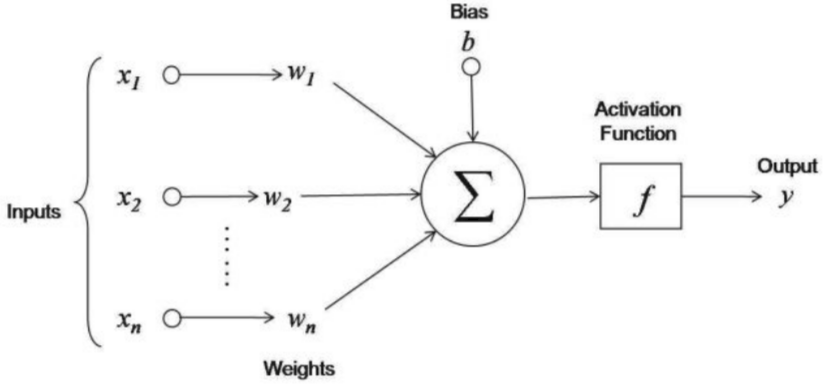

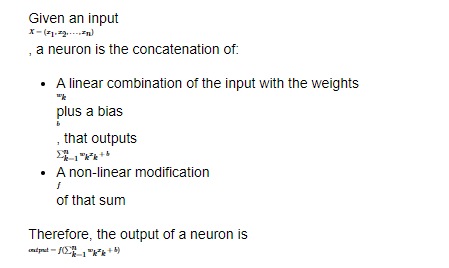

## Activation Functions (well known examples)


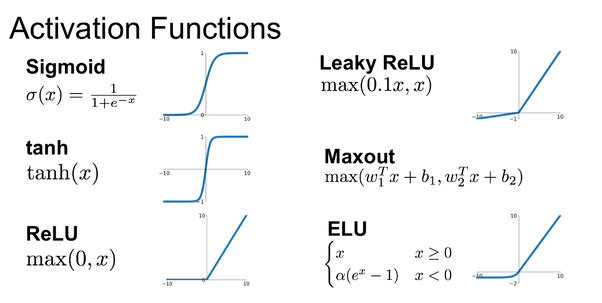

❓ Which of these activations did we just code?

Imagine now that you produce another output by:

applying another linear regression to the same input X
followed by the same activation function

In [14]:
def linreg_2(X):
    return -5 - 0.1*X[0] + 1.2*X[1] + 4.9*X[2] - 3.1*X[3]

out_2 = activation(linreg_2(X))

And a third one

In [15]:
def linreg_3(X):
    return -8 + 0.4*X[0] + 2.6*X[1] +- 2.5*X[2] + 3.8*X[3]

out_3 = activation(linreg_3(X))

**We just wrote a LAYER of neurons**

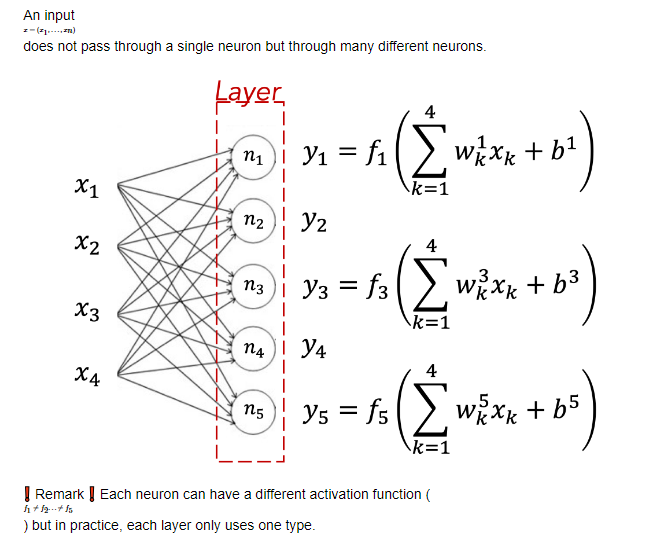

**What if we use the 3 outputs of this layer as input of another layer, again?**

In [16]:
import numpy as np

def linreg_next_layer(X):
    return 5.1 + 1.1*X[0] - 4.1*X[1] - 0.7*X[2]

def activation_next_layer(x):
    # sigmoid activation for clasification task!
    return 1. / (1 + np.exp(-x))

def neural_net_predictor(X):

    out_1 = activation(linreg_1(X))
    out_2 = activation(linreg_2(X))
    out_3 = activation(linreg_3(X))

    outs = [out_1, out_2, out_3]

    y_pred = activation_next_layer(linreg_next_layer(outs))

    return y_pred

In [17]:
# Final prediction
y_pred = neural_net_predictor(X)

print(f' Probability of being a dog: {y_pred}')

 Probability of being a dog: 0.832716044461517


🎉 Congrats! You just built your first (artificial) neural network.

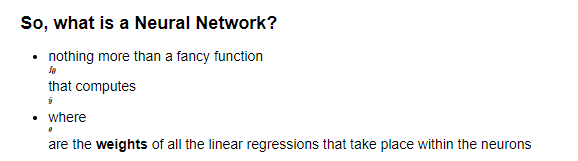

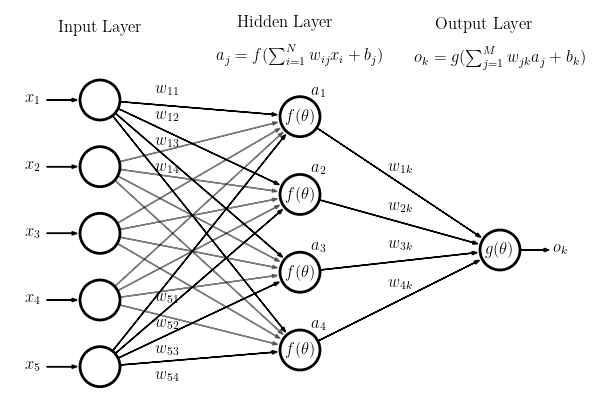

All these neurons and layers make up the architecture of the neural network.

❓ Question: How many weights are trained in layer 1? In layer 2?

Deep Learning simply refers to Neural Networks (that have many layers)

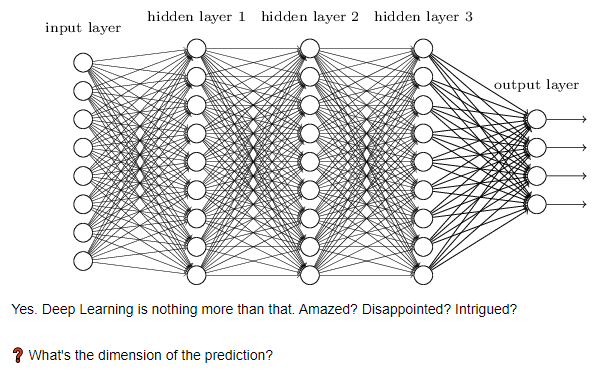
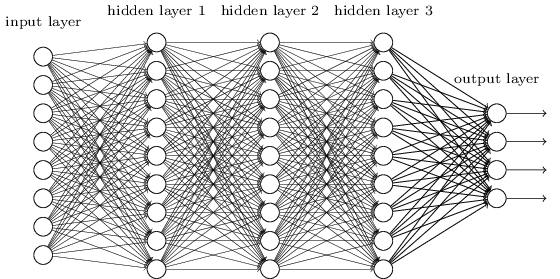

**🤔 Why using activation function at all?**

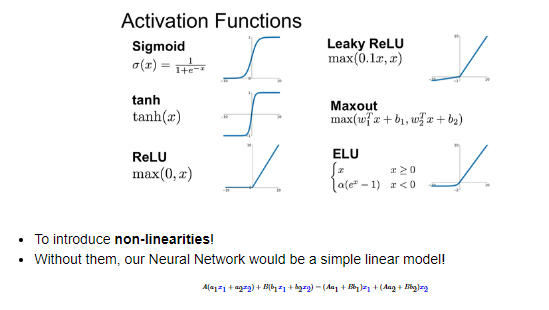

💻 Let's visualize a Neural Network on [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.13983&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&showTestData_hide=true&stepButton_hide=false&activation_hide=false&problem_hide=false&batchSize_hide=true&dataset_hide=false&resetButton_hide=false&discretize_hide=true&playButton_hide=false&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&numHiddenLayers_hide=false)


- Look familiar? Hit the play button ▶️ and see what happens!
- Can you fit this non-linear problem with only linear activations ? 🤔
- Try to fit the other datasets, keeping only one layer
- Try a regression task!

# 2. My first Neural Network in Keras

## 2.1 Keras

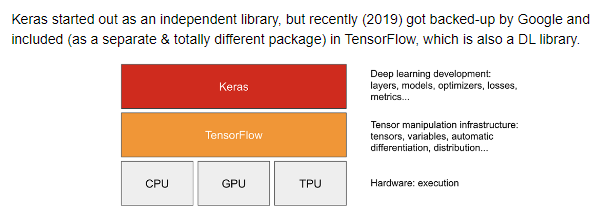

In terminal for installation:

✅ `pip install tensorflow`

❌ `pip install keras`

In Python to code:

✅ `from tensorflow.keras import *`

❌ `from keras import *`

📚 tensorflow.keras [official docs](https://www.tensorflow.org/guide/keras)

***Defining & Training a Neural Network in three steps:***

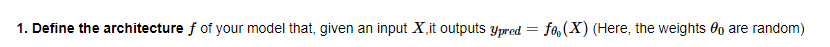
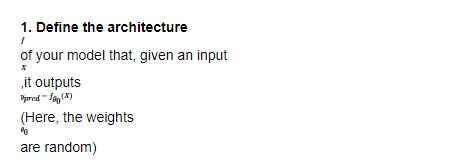

In [ ]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(...)

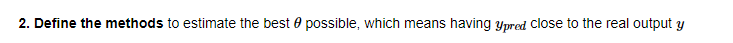
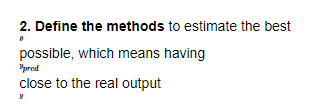

In [ ]:
model.compile(...)

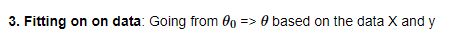

In [ ]:
model.fit(X, y, ...)

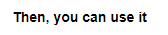

In [ ]:
y_new = model.predict(X_new)

❓ Here is the perfect time to ask questions.

🤔 Ok, but what are we hiding in the ...?

## 2.2 Sequential architecture : model.add(...)

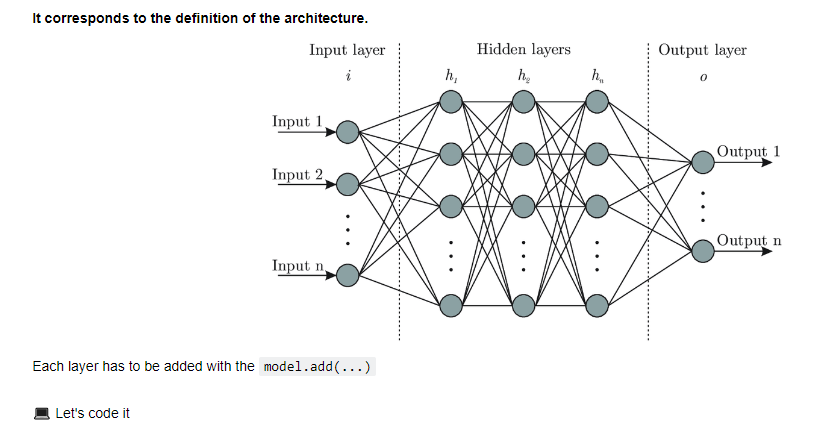

In [ ]:
from tensorflow.keras import Sequential, layers

# Basically, it will look like a sequence of layers
model = Sequential()

# First layer: 10 neurons and ReLU as the activation function
model.add(layers.Dense(10, activation='relu'))

# Disclaimer: The standard layers are called Fully Connected (Dense in Keras)

In [ ]:
# You can go for two fully connected layers
model = Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='tanh'))

In [ ]:
# You can also go for many, many, many more ...

model = Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(10, activation='linear'))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(40, activation='softmax'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(9, activation='tanh'))
model.add(layers.Dense(8900, activation='relu'))
model.add(layers.Dense(1000, activation='tanh'))

**Decision Rules**

🤔 Ok... but how am I supposed to choose?

- Most decisions rely on practice
- Nonetheless, some are directly related to the problem/task you are tackling!

**Mandatory rule 1: FIRST LAYER needs the size of your input**

In [ ]:
# Imagine each observation has 4 features (x1, x2, x3, x4)
model = Sequential()
model.add(layers.Dense(10, input_dim=4, activation='relu'))

- The model has to know the size of your input
- It directly impacts the number of weights in the linear combinations of the neurons of the first layer

**Mandatory rule 2: LAST LAYER is dictated by the task**

**REGRESSION** TASKS REQUIRE **LINEAR** ACTIVATION FUNCTIONS

In [ ]:
### size 1 (predict one value):
model.add(layers.Dense(1, activation='linear'))

# OR

### size 13 (y_pred.shape=(13,))
model.add(layers.Dense(13, activation='linear'))

**CLASSIFICATION** TASKS REQUIRES **SOFTMAX**/SIGMOID

In [ ]:
### 2 classes (binary)
model.add(layers.Dense(1, activation='sigmoid'))

# OR

### 8 classes (y_pred.shape=(8,))
model.add(layers.Dense(8, activation='softmax'))

**Softmax** turns numbers into **probabilities** that sums to 1:

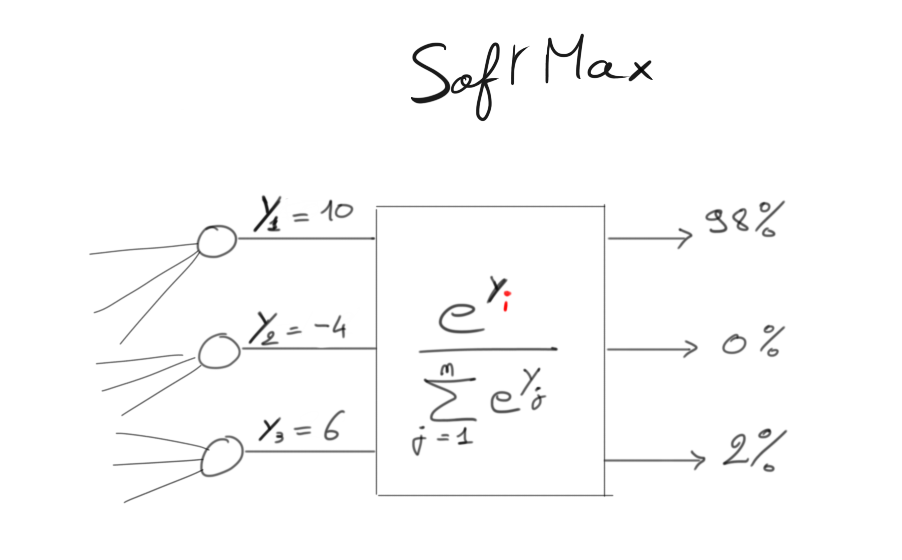

☝️ Softmax (2 classes) = Sigmoid

**Full Model Recap**

In [ ]:
### Regression of size 1
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=100))
#model.add(...)
model.add(layers.Dense(1, activation='linear'))


### Regression of size 13
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=100))
#model.add(...)
model.add(layers.Dense(13, activation='linear'))


### Classification with 2 classes
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=100))
#model.add(...)
model.add(layers.Dense(1, activation='sigmoid'))


### Classification with 8 classes
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=100))
#model.add(...)
model.add(layers.Dense(8, activation='softmax'))

❓ Which task was our first example? Which activation did we use?

**[Playground](https://playground.tensorflow.org) challenge**

💻 Build a model with three hidden layers where the first has 5 neurons, the second has 4 neurons and the third has 3 neurons.

Then, run it on any dataset.

In practice, apart from the input size and the last layer, you have to choose:

- the number of neurons
- the number of layers
- the activation functions


**But how?**

=> This is the experimental part. This is where the mastery of Deep Learning comes in.

Practice has shown us that some decisions are best to start with as they usually work better.

💡 For instance, (almost) always start with the relu activation function - if it is not the last layer!

### Counting number of parameters with model.summary()

In [2]:
# Small exercice: how many parameters in this simple regression task:
from tensorflow.keras import Sequential
import tensorflow.keras.layers as layers

model = Sequential()
model.add(layers.Dense(10, input_dim=4, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [ ]:
# ??

In [3]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                50        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Small exercice: how many parameters in this model:

model = Sequential()
model.add(layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Answer : Use the summary() function to keep track of what you are doing

model = Sequential()
model.add(layers.Dense(64, input_shape=(784,), activation='relu'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
print("manual calculation = ", (64*784 + 64) + (64*64 + 64) + (10*64 + 10))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
manual calculation =  55050


# 3. Training: loss & optimization procedure

`model.compile(...)`

`model.fit(...)`

## 3.1 Compiling

In [ ]:
model.compile(loss='mse', optimizer='adam')

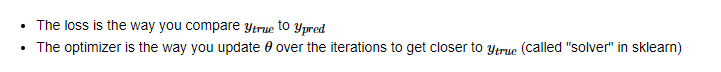

## 3.2 Fitting

In [ ]:
model.fit(X, y, batch_size=32, epochs=10)

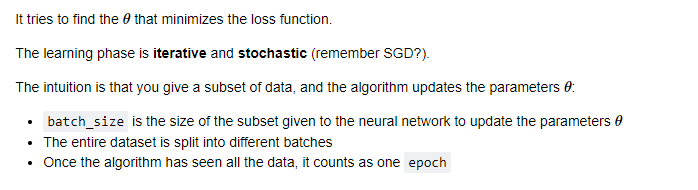

4. Full Example: Face recognition

In [5]:
# Load data
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [ ]:
# 2 different target classes
np.unique(faces.target)

In [ ]:
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

**Minimal preprocessing**

In [ ]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

In [ ]:
y = faces.target
y.shape

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [ ]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

**Simple model with 2 hidden layers**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pandas as pd

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics = 'accuracy')

model.fit(X_train, y_train, batch_size=16, epochs=20)

**Evaluate performance**

In [ ]:
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

🤔 Is it good? What's our baseline?

In [ ]:
pd.Series(y).value_counts()

In [ ]:
# Baseline score
530 / (530+236)

**Let's check our predictions!**

In [ ]:
# Predicted probabilities
model.predict(scaler.transform(X_test))

# Conclusion & Intuition

**All in all, Deep Learning is nothing more than**

- multiple linear regressions stacked together
- non-linear functions: the activation functions

### Why does it work?

**A) Mathematically speaking**

Dense networks are **universal approximations**: with just one hidden layer, they can approximate any continuous function with arbitrary precision.

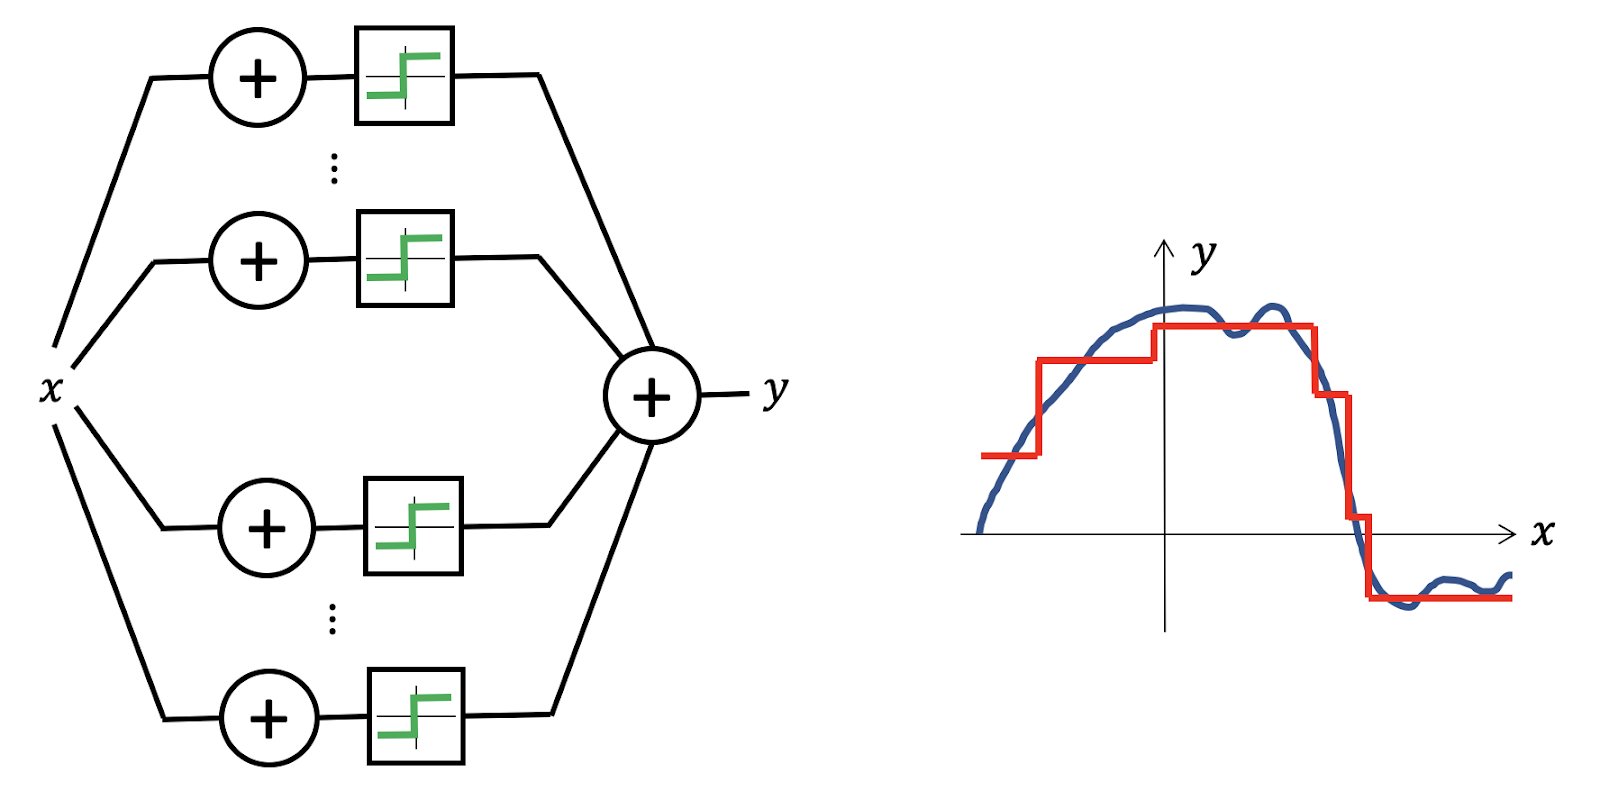

☝️ This does not guarantee that you can easily find these optimal parameters of your model!

It may require extremely large sample size or computing power.

You will see that dense networks are not always the most appropriate architecture (in particular for images, text...).

**B) Intuitively speaking**

❗️ Contrary to other ML algorithms, Neural Networks are very hard to understand intuitively.

Therefore, the goal is not to understand **why** it works to start with.

The goal is to learn **what** makes it work.

🚀 Let's do that by practicing.

### 💡 Pro tips:

- First layer needs the size of your input
- Last layer's number of neurons equals the output dimension
- Last layer's activation is Linear (regression) or softmax/sigmoid (classification)
- Almost always **start** with the relu activation function - if it is not the last layer

### Bibliography

- [How many layers / neurons do I need?](https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e)
- [Activation function explained by Louis Bouchard](https://www.louisbouchard.ai/densenet-explained/)